In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [2]:
def dataset(cls1, cls2):
    x1,y1 = cls1.T
    x2,y2 = cls2.T
    return [x1,y1,x2,y2]

In [3]:
def fisher(cls1, cls2):
    cls1 = np.array(cls1)
    cls2 = np.array(cls2)
    mean1 = np.mean(cls1, axis = 0)
    mean2 = np.mean(cls2, axis = 0)
    sw = np.zeros((cls1.shape[1],cls1.shape[1]))  #Dim = 2
    for xn in cls1:
        xn = xn.reshape(cls1.shape[1],1)
        mean1 = mean1.reshape(cls1.shape[1],1)  #center of class 1
        sw += np.dot((xn-mean1),(xn-mean1).T)
    for xn in cls2:
        xn = xn.reshape(cls2.shape[1],1)
        mean2 = mean2.reshape(cls2.shape[1],1)  #center of class 2
        sw += np.dot((xn-mean2),(xn-mean2).T)
    inv_sw = np.linalg.inv(sw) 
    
    w = inv_sw.dot(mean1-mean2) #Weight
    return [w,mean1,mean2]

In [4]:
def decision_boundary():    # y*w[1] + x*w[0] +intercept = 0
    x = np.linspace(-10,10,1000)  
    F = fisher(cls1,cls2)
    w = F[0]
    midpoint = (F[1] + F[2])/2  #midpoint of the line joining the 2 centers of 2 classes
    a = -w[0]/w[1]
    b = a*midpoint[0] + midpoint[1]
    y = a*x + b
    
    return x,y,a,b

In [5]:
def classification(cls1,cls2):
    TP = 0  #True Positives
    TN = 0  #True Negatives
    FP = 0  #False Positives
    FN = 0  #False Negatives
    D = decision_boundary()
    x1,y1 = cls1.T
    x2,y2 =cls2.T
    y1_predict = D[2]*x1 + D[3] #a*x1+b
    y2_predict = D[2]*x2 + D[3]
    for i in range(N):
      if y1_predict[i] > y1[i]:
        TP +=1
      else:
        FN +=1
      if y2_predict[i] > y2[i]:
        FP +=1
      else:
        TN +=1
# Calculate accuracy: TP+TN/(TP+TN+FP+FN)
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    print("Accuracy =%.4f"%accuracy)
# Calculate precision: TP/(TP+FP)
    precision =  TP/(TP+FP)
    print("Precision =%.4f"%precision)
# Calculate Recall : TP/(TP+FN)
    Recall = TP/(TP+FN)
    print("Recall =%.4f"%Recall)
# Calculate F1 score = 2*(Precision * Recall)/(Precision + Recall)
    F1 = 2*(precision * Recall)/(precision + Recall)
    print("F1 Score = %.4f"%F1)
    return x1,y1_predict,x2,y2_predict

In [6]:
N = 200
mean = [[-5,-5], [5,5]] #center
cov = [[8,4],[4,8]] #covariance
cls1 = np.random.multivariate_normal(mean[0],cov,N)
cls2 = np.random.multivariate_normal(mean[1],cov,N)
data = dataset(cls1,cls2)
fs =fisher(cls1,cls2)
d = decision_boundary()
print("y = ","%.3f"%d[2],"*x + ","%.3f"%d[3])
cls = classification(cls1,cls2)

y =  -1.082 *x +  -0.199
Accuracy =0.9725
Precision =0.9846
Recall =0.9600
F1 Score = 0.9722


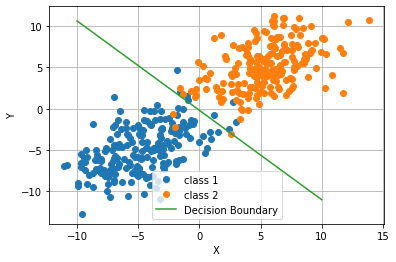

In [7]:
plt.plot(data[0],data[1],'o',label = "class 1")
plt.plot(data[2],data[3],'o',label = "class 2")
plt.plot(d[0],d[1],label = "Decision Boundary")
#plt.plot(cls[0],cls[1])
#plt.plot(cls[2],cls[3])
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()